<a href="https://colab.research.google.com/github/Jdasanja/masers_thesis/blob/main/ML_ago_trained_on_fem_pop_binary_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas for reading and displaying local file
import pandas as pd

In [ ]:
# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Jdasanja/masers_thesis/main/processed.cleveland.data'
df = pd.read_csv(url, header=None)

# Add column names (based on standard attribute names for the Cleveland dataset)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'num']

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)


# Display first few rows of the uploaded file with headers
print("First few rows of the uploaded file with column headers:")
print(df.head())

First few rows of the uploaded file with column headers:
             age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
patient_id                                                                  
1           63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
2           67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
3           67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
4           37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5           41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

            oldpeak  slope   ca thal  num  
patient_id                                 
1               2.3    3.0  0.0  6.0    0  
2               1.5    2.0  3.0  3.0    2  
3               2.6    2.0  2.0  7.0    1  
4               3.5    3.0  0.0  3.0    0  
5               1.4    1.0  0.0  3.0    0  


In [ ]:
# Create a new dataframe with a new binary column based on the values in 'num'
df_binary_col = df.copy()
df_binary_col['num_binary'] = df_binary_col['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

df_binary_col = df_binary_col.drop('num', axis=1)

In [ ]:
## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
import numpy as np

## Replace question marks with NaN
df_binary_col.replace('?', np.nan, inplace=True)

## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
## Drop rows with NaN values
df_binary_col.dropna(inplace=True)

## Verify if any null values remain
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<h1> Only Include Female Population </h1>

In [ ]:
df_binary_col = df_binary_col[df_binary_col['sex'] == 0]
df_binary_col = df_binary_col.drop(columns=['sex'])

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable

<h1> Transformation Test 1 </h1>
<br>
Logarithmic Transformation of for Resting Blood Pressure and Cholesterol. Squared Transformation of Maximum Heart Rate

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("scaling", StandardScaler(), ['age','cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformedtest = ct.fit_transform(X_train)
X_test_transformedtest = ct.transform(X_test)

<h1>Random Forrest Classifier on Transformation 1</h1>

Accuracy of the model: 0.75
F1 Score of the model: 0.7077922077922079
Precision: 0.86
Recall: 0.75


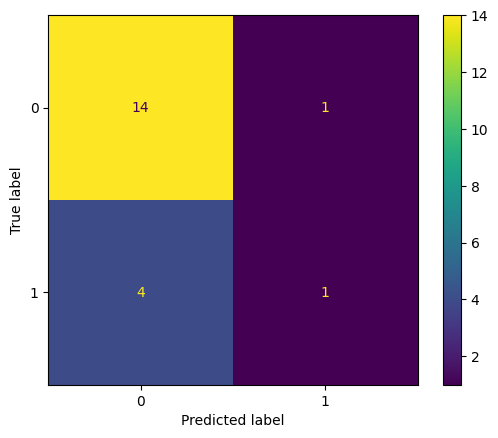

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformedtest, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformedtest)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

In [ ]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_transformedtest, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformedtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.60      0.75         5

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



<h1><strong> Transformation Test 2 </strong></h1>
<ol>
<li>Logarithmic Transformation for Resting Blood Pressure and Cholesterol.</li>
<li>Squared Transformation of Maximum Heart Rate</li>
<li> <strong>combination of oldpeak and slope </strong></li> </ol>

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("scaling", StandardScaler(), ['age','fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal', 'cp'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

<h2> Random Forrest Classifier on Transformation 2 </h2>

Accuracy of the model: 0.8
F1 Score of the model: 0.78125
Precision: 0.8533333333333333
Recall: 0.8


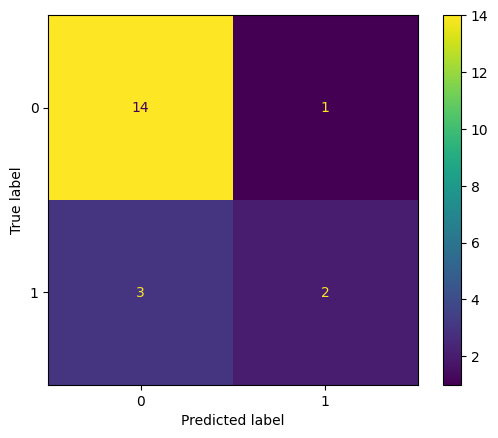

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=1,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2>XGB Forrest Classifier on Transformation 2</h2>

In [ ]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.40      0.57         5

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20



<h1> K-Means Crossfold Validation </h1>

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)
clf_model = clf.fit(X_train_transformed, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.75 0.25 0.75 1.   0.5 ]
Mean Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

Cross-Validation Results (Precision): [0. 0. 0. 1. 0.]
Mean Precision: 0.2
Cross-Validation Results (Recall): [0. 0. 0. 1. 0.]
Mean Recall: 0.2
Cross-Validation Results (F1 Score): [0. 0. 0. 1. 0.]
Mean F1 Score: 0.2


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5
xgb_classifier_model = xgb_classifier.fit(X_train_transformed, y_train)
cross_val_results_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_xgb}')
print(f'Mean Accuracy: {cross_val_results_xgb.mean()}')

# Custom scoring functions
precision_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test_xgb}')
print(f'Mean Precision: {precision_test_xgb.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test_xgb}')
print(f'Mean Recall: {recall_test_xgb.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test_xgb}')
print(f'Mean F1 Score: {f1_test_xgb.mean()}')


Cross-Validation Results (Accuracy): [1.   0.25 1.   1.   0.5 ]
Mean Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

Cross-Validation Results (Precision): [0. 0. 1. 1. 0.]
Mean Precision: 0.4
Cross-Validation Results (Recall): [0. 0. 1. 1. 0.]
Mean Recall: 0.4
Cross-Validation Results (F1 Score): [0. 0. 1. 1. 0.]
Mean F1 Score: 0.4


<h1> Addressing the imbalanced dataset </h1>

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from imblearn.combine import SMOTEENN
import numpy as np

# ==========================
# Handle Class Imbalance
# ==========================

# Optional: Use SMOTEENN for oversampling and undersampling
smoteenn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smoteenn.fit_resample(X_train_transformed, y_train)

# ==========================
# Define Base Classifiers
# ==========================

# Random Forest
rf_clf = RandomForestClassifier(
    class_weight={0: 1, 1: 10},  # Adjust class weights
    n_estimators=25,
    random_state=42,
    max_depth=20
)

# XGBoost (Binary Classification)
xgb_clf = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    objective='binary:logistic',  # Binary classification objective
    use_label_encoder=False
)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Use probabilities for decision making
)

# ==========================
# Train the Ensemble Model
# ==========================

# Fit the ensemble model with SMOTE-balanced data
ensemble_clf.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformed)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test, y_pred_ensemble, average='binary')  # 'binary' for binary classification

# Precision
precision = precision_score(y_test, y_pred_ensemble, average='binary', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_ensemble, average='binary')

# Classification Report
report = classification_report(y_test, y_pred_ensemble, target_names=['Class 0', 'Class 1'])

# Output Results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:32:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8
F1 Score: 0.6
Precision: 0.6
Recall: 0.6

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.87      0.87        15
     Class 1       0.60      0.60      0.60         5

    accuracy                           0.80        20
   macro avg       0.73      0.73      0.73        20
weighted avg       0.80      0.80      0.80        20



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from imblearn.combine import SMOTEENN
import numpy as np

# ==========================
# Handle Class Imbalance
# ==========================

# Use SMOTEENN for oversampling and undersampling
smoteenn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smoteenn.fit_resample(X_train_transformed, y_train)

# ==========================
# Define Random Forest Classifier
# ==========================

# Random Forest with custom class weights for imbalance
rf_clf = RandomForestClassifier(
    class_weight={0: 1, 1: 10},  # Adjust weights for imbalanced classes
    n_estimators=100,           # Number of trees in the forest
    max_depth=20,               # Maximum depth of the trees
    random_state=42             # Ensures reproducibility
)

# ==========================
# Train the Random Forest Model
# ==========================

# Fit the model on the balanced training data
rf_clf.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
y_pred_rf = rf_clf.predict(X_test_transformed)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# F1 Score
f1 = f1_score(y_test, y_pred_rf, average='binary')  # 'binary' for binary classification

# Precision
precision = precision_score(y_test, y_pred_rf, average='binary', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_rf, average='binary')

# Classification Report
report = classification_report(y_test, y_pred_rf, target_names=['Class 0', 'Class 1'])

# Output Results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:")
print(report)


Accuracy: 0.8
F1 Score: 0.5
Precision: 0.6666666666666666
Recall: 0.4

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      0.93      0.88        15
     Class 1       0.67      0.40      0.50         5

    accuracy                           0.80        20
   macro avg       0.75      0.67      0.69        20
weighted avg       0.78      0.80      0.78        20



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from imblearn.combine import SMOTEENN
import numpy as np

# ==========================
# Handle Class Imbalance
# ==========================

# Use SMOTEENN for oversampling and undersampling
smoteenn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smoteenn.fit_resample(X_train_transformed, y_train)

# ==========================
# Define XGBoost Classifier
# ==========================

# XGBoost for binary classification
xgb_clf = XGBClassifier(
    random_state=42,            # Ensures reproducibility
    eval_metric='logloss',      # Binary classification metric
    objective='binary:logistic',# Binary classification objective
    use_label_encoder=False,    # Avoids label encoding warnings
    scale_pos_weight=10         # Balances the weight for minority class
)

# ==========================
# Train the XGBoost Model
# ==========================

# Fit the model on the balanced training data
xgb_clf.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
y_pred_xgb = xgb_clf.predict(X_test_transformed)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)

# F1 Score
f1 = f1_score(y_test, y_pred_xgb, average='binary')  # 'binary' for binary classification

# Precision
precision = precision_score(y_test, y_pred_xgb, average='binary', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_xgb, average='binary')

# Classification Report
report = classification_report(y_test, y_pred_xgb, target_names=['Class 0', 'Class 1'])

# Output Results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8
F1 Score: 0.6
Precision: 0.6
Recall: 0.6

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.87      0.87        15
     Class 1       0.60      0.60      0.60         5

    accuracy                           0.80        20
   macro avg       0.73      0.73      0.73        20
weighted avg       0.80      0.80      0.80        20



In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)
clf_model = clf.fit(X_train_balanced, y_train_balanced)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.75 0.25 0.75 1.   0.5 ]
Mean Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

Cross-Validation Results (Precision): [0. 0. 0. 1. 0.]
Mean Precision: 0.2
Cross-Validation Results (Recall): [0. 0. 0. 1. 0.]
Mean Recall: 0.2
Cross-Validation Results (F1 Score): [0. 0. 0. 1. 0.]
Mean F1 Score: 0.2


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5
xgb_classifier_model = xgb_classifier.fit(X_train_transformed, y_train)
cross_val_results_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_xgb}')
print(f'Mean Accuracy: {cross_val_results_xgb.mean()}')

# Custom scoring functions
precision_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test_xgb}')
print(f'Mean Precision: {precision_test_xgb.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test_xgb}')
print(f'Mean Recall: {recall_test_xgb.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test_xgb}')
print(f'Mean F1 Score: {f1_test_xgb.mean()}')

Cross-Validation Results (Accuracy): [1.   0.25 1.   1.   0.5 ]
Mean Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

Cross-Validation Results (Precision): [0. 0. 1. 1. 0.]
Mean Precision: 0.4
Cross-Validation Results (Recall): [0. 0. 1. 1. 0.]
Mean Recall: 0.4
Cross-Validation Results (F1 Score): [0. 0. 1. 1. 0.]
Mean F1 Score: 0.4
